<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Planet-types" data-toc-modified-id="Planet-types-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Planet types</a></span><ul class="toc-item"><li><span><a href="#Radius-/-mass" data-toc-modified-id="Radius-/-mass-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Radius / mass</a></span></li><li><span><a href="#Thermal-type" data-toc-modified-id="Thermal-type-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Thermal type</a></span></li></ul></li><li><span><a href="#Stellar-radius-/-mass" data-toc-modified-id="Stellar-radius-/-mass-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stellar radius / mass</a></span></li><li><span><a href="#Habitability" data-toc-modified-id="Habitability-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Habitability</a></span></li><li><span><a href="#ESI" data-toc-modified-id="ESI-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ESI</a></span></li></ul></div>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
%matplotlib inline

# Setting style for the whole notebook
sns.set_palette('colorblind')
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1)

# Increasing the number of rows and columns shown since database has 65 columns
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [75]:
df = pd.read_csv('../datasets/phl_new_processed.csv')
df.head()

,p_mass,p_radius,p_period,p_semi_major_axis,p_eccentricity,p_angular_distance,p_impact_parameter,s_ra,s_dec,s_mag,s_distance,s_metallicity,s_mass,s_radius,s_temperature,s_log_g,p_hill_sphere,p_distance,p_periastron,p_apastron,p_distance_eff,p_flux,p_temp_equil,p_type,s_radius_est,s_ra_h,s_ra_t,s_dec_t,s_luminosity,s_snow_line,s_abio_zone,s_tidal_lock,p_habzone_opt,p_habzone_con,p_type_temp,p_habitable,p_esi,p_radius_est,p_mass_est,p_semi_major_axis_est
0,6165.86330,NaN,326.03000,1.29,0.231,13.8,NaN,185.17928,17.792868,4.740,93.37,-0.35,2.70,19.00,4742.0,2.31,0.130671,1.324418,0.99201,1.58799,1.298759,101.011410,799.44963,Jovian,19.00,12.345286,12 20 43.0286,+17 47 34.3248,163.546800,34.529063,0.476460,0.642400,0,0,Hot,0,0.083813,12.082709,6165.86330,1.29
1,4684.78480,NaN,516.21997,1.53,0.080,12.2,NaN,229.27454,71.823898,5.016,125.72,-0.02,2.78,29.79,4213.0,1.93,0.167551,1.534896,1.40760,1.65240,1.531227,107.351180,819.07569,Jovian,29.79,15.284970,15 17 05.8915,+71 49 26.0328,250.492940,42.732816,0.193891,0.648683,0,0,Hot,0,0.082414,12.229641,4684.78480,1.53
2,1525.57440,NaN,185.84000,0.83,0.000,11.0,NaN,352.82257,39.236198,5.227,75.59,-0.24,2.20,11.00,4813.0,2.63,0.073485,0.830000,0.83000,0.83000,0.830000,84.446427,772.30746,Jovian,11.00,23.521506,23 31 17.4215,+39 14 10.3128,58.175144,20.593611,0.502752,0.600010,0,0,Hot,0,0.081917,12.848516,1525.57440,0.83
3,1481.07850,NaN,1773.40000,2.93,0.370,163.0,NaN,242.60130,43.817646,6.610,17.94,0.41,0.90,0.93,5338.0,4.45,0.217991,3.130558,1.84590,4.01410,2.982550,0.078887,131.38424,Jovian,0.93,16.173421,16 10 24.3158,+43 49 03.5256,0.629171,2.141648,0.919756,0.445415,0,0,Cold,0,0.145241,12.865261,1481.07850,2.93
4,565.73385,NaN,798.50000,1.66,0.680,78.5,NaN,295.46655,50.517525,6.250,21.15,0.06,1.08,1.13,5750.0,4.36,0.042832,2.043792,0.53120,2.78880,1.774870,0.618972,202.22783,Jovian,1.13,19.697771,19 41 51.9764,+50 31 03.0900,1.250596,3.019411,1.983658,0.473325,1,1,Warm,0,0.368627,13.421749,565.73385,1.66


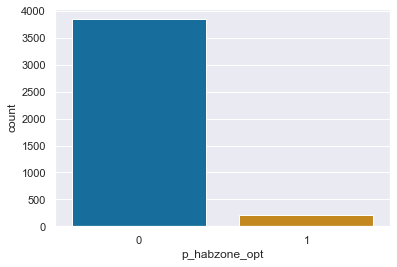

In [76]:
# P_HABZONE_OPT - the planet is in the optimistic habitable zone flag (1 = yes)
# P_HABZONE_CON - the planet is in the conservative habitable zone flag (1 = yes)

sns.countplot(x="p_habzone_opt", data=df);

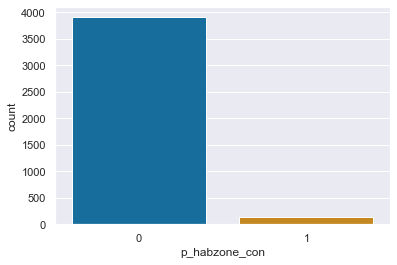

In [77]:
sns.countplot(x="p_habzone_con", data=df);

# Planet types

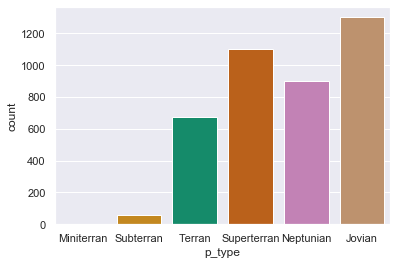

In [92]:
sns.countplot(x="p_type", data=df, 
              order=['Miniterran', 'Subterran', 'Terran', 'Superterran', 'Neptunian', 'Jovian']);

## Radius / mass

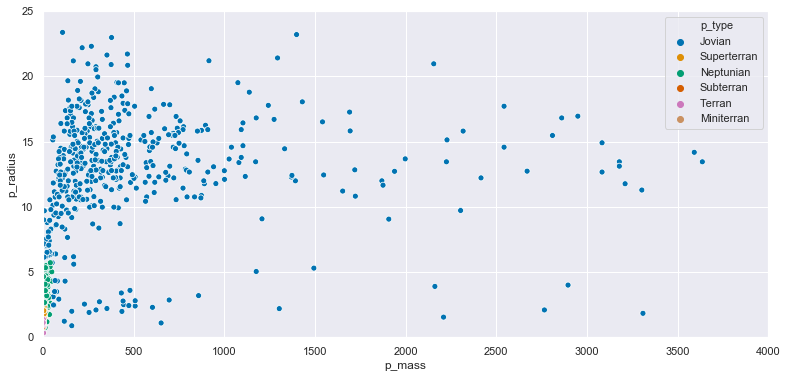

In [79]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="p_mass", y="p_radius", hue='p_type', data=df)
plt.ylim([0, 25])
plt.xlim([0, 4000]);

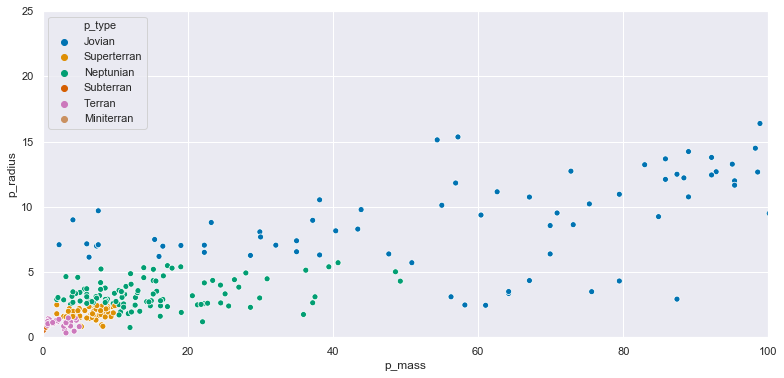

In [80]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="p_mass", y="p_radius", hue='p_type', data=df)
plt.ylim([0, 25])
plt.xlim([0, 100]);

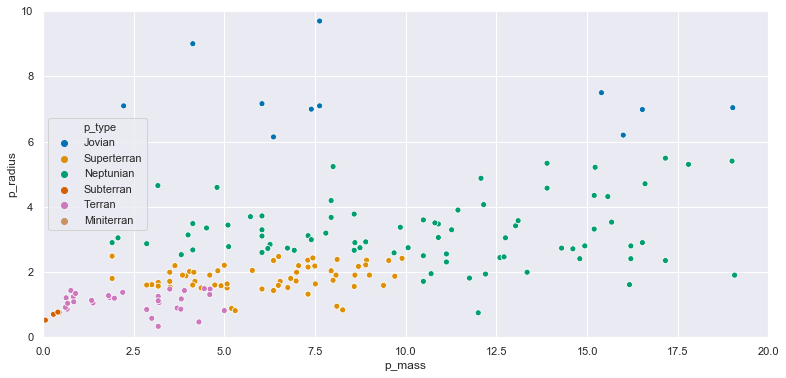

In [81]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="p_mass", y="p_radius", hue='p_type', data=df)
plt.ylim([0, 10])
plt.xlim([0, 20]);

## Thermal type

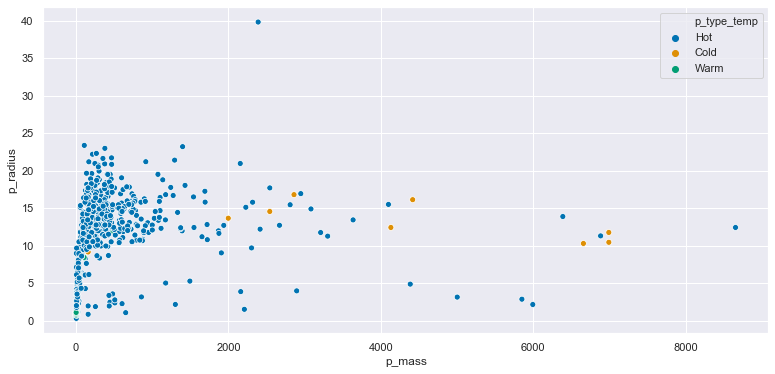

In [82]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="p_mass", y="p_radius", hue='p_type_temp', data=df);

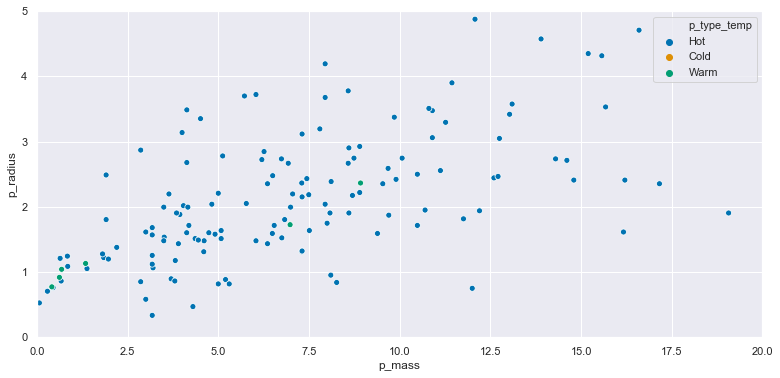

In [83]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="p_mass", y="p_radius", hue='p_type_temp', data=df)
plt.ylim([0, 5])
plt.xlim([0, 20]);

# Stellar radius / mass

In [84]:
list(df)

['p_mass',
 'p_radius',
 'p_period',
 'p_semi_major_axis',
 'p_eccentricity',
 'p_angular_distance',
 'p_impact_parameter',
 's_ra',
 's_dec',
 's_mag',
 's_distance',
 's_metallicity',
 's_mass',
 's_radius',
 's_temperature',
 's_log_g',
 'p_hill_sphere',
 'p_distance',
 'p_periastron',
 'p_apastron',
 'p_distance_eff',
 'p_flux',
 'p_temp_equil',
 'p_type',
 's_radius_est',
 's_ra_h',
 's_ra_t',
 's_dec_t',
 's_luminosity',
 's_snow_line',
 's_abio_zone',
 's_tidal_lock',
 'p_habzone_opt',
 'p_habzone_con',
 'p_type_temp',
 'p_habitable',
 'p_esi',
 'p_radius_est',
 'p_mass_est',
 'p_semi_major_axis_est']

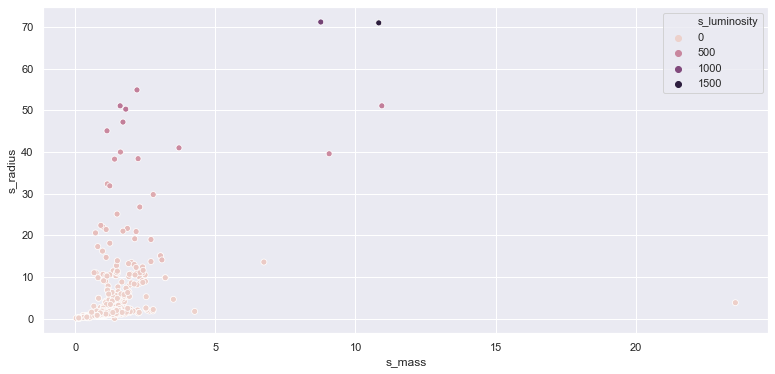

In [85]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="s_mass", y="s_radius", hue='s_luminosity', data=df)
# plt.ylim([0, 25])
# plt.xlim([0, 4000]);

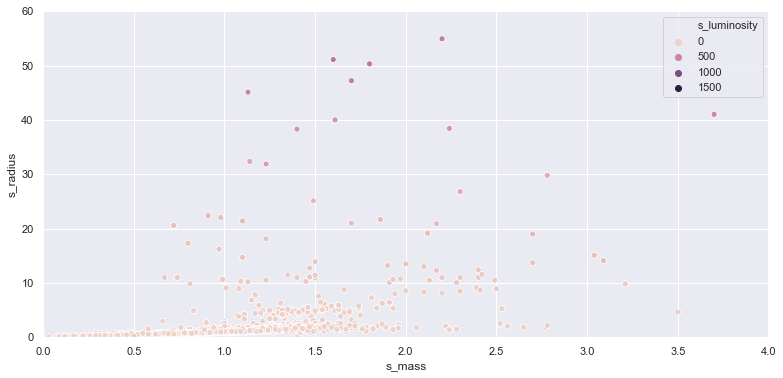

In [86]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="s_mass", y="s_radius", hue='s_luminosity', data=df)
plt.ylim([0, 60])
plt.xlim([0, 4]);

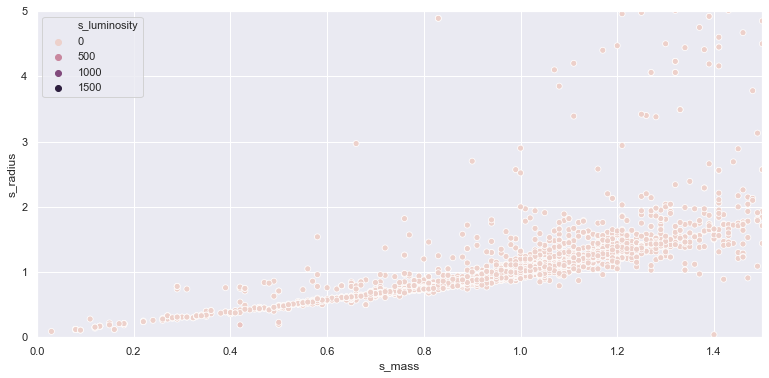

In [87]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="s_mass", y="s_radius", hue='s_luminosity', data=df)
plt.ylim([0, 5.0])
plt.xlim([0, 1.5]);

# Habitability

In [88]:
set(df['p_habitable'])

{0, 1, 2}

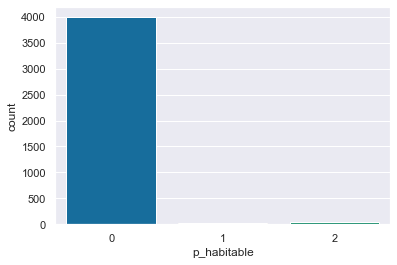

In [89]:
# P_HABITABLE - planet is potentially habitable index (1 = conservative, 2 = optimistic)
sns.countplot(data=df, x='p_habitable')

# ESI

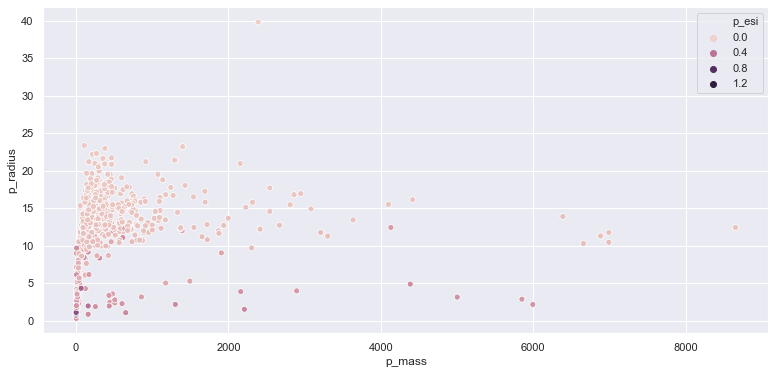

In [91]:
# P_ESI - planet Earth Similarity Index
plt.figure(figsize=(13,6))
sns.scatterplot(x="p_mass", y="p_radius", hue='p_esi', data=df)
# plt.ylim([0, 10])
# plt.xlim([0, 20]);